In [43]:
#1)a)
import numpy as np
data = np.loadtxt('C:/Users/Nicolas Prst/Downloads/TP_RN2/dataset.dat')

In [44]:
X = data[:,0:2]
y = data[:,2]
y = y.astype(int)

In [45]:
data.shape

(300, 3)

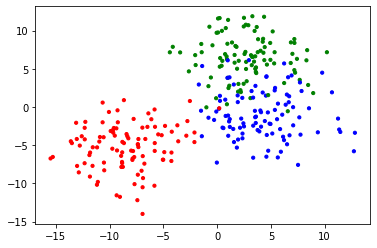

In [46]:
#visualiser les données
from matplotlib import pyplot
colors = np.array([x for x in "rgbcmyk"])
pyplot.scatter(X[:, 0], X[:, 1], color=colors[y].tolist(), s=10)
pyplot.show()

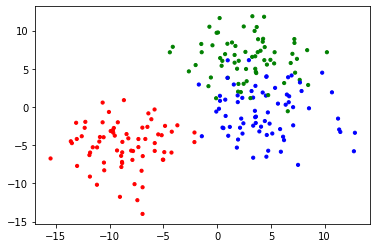

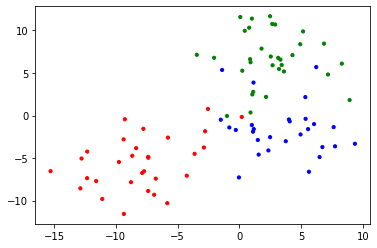

In [47]:
#partition des données
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)
pyplot.scatter(X_train[:, 0], X_train[:, 1], color=colors[y_train].tolist(), s=10)
pyplot.show()
pyplot.scatter(X_test[:, 0], X_test[:, 1], color=colors[y_test].tolist(), s=10)
pyplot.show()

In [90]:
#b)
from sklearn.linear_model import SGDClassifier
A = 0.000001
B = 1

In [91]:
clf1=SGDClassifier(loss='perceptron', eta0=A, max_iter=B, learning_rate='constant', verbose=1)
clf1.fit(X_train, y_train)
round(clf1.score(X_train, y_train), 2)

-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000010, T: 210, Avg. loss: 0.000001
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000018, T: 210, Avg. loss: 0.000004
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 0.00, NNZs: 2, Bias: -0.000016, T: 210, Avg. loss: 0.000007
Total training time: 0.00 seconds.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
C:\Users\Nicolas Prst\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


0.86

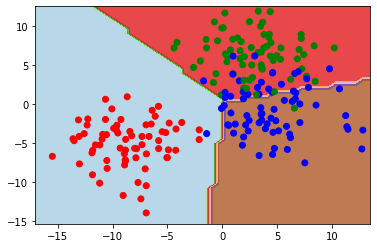

In [92]:
# Créer une grille
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
x_h = (x_max - x_min)/50
y_h = (y_max - y_min)/50
xx, yy = np.meshgrid(np.arange(x_min, x_max, x_h), np.arange(y_min, y_max, y_h))
Y = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)

#afficher les frontières/données d'apprentissage
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X_train[:, 0], X_train[:, 1], cmap=pyplot.cm.Paired, color=colors[y_train].tolist())
pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())
pyplot.show()

In [87]:
#2)a)
from sklearn.neural_network import MLPClassifier
import statistics as stat
clf2 = MLPClassifier(hidden_layer_sizes=5, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate_init=0.01, max_iter=100, momentum=0)

In [88]:
#b)
clf2.fit(X_train, y_train)
clf2.predict(X_test)
print("Coût :", clf2.loss_)
print("Nombre iterations :", clf2.n_iter_)

Coût : 0.2002264053081376
Nombre iterations : 34


In [56]:
#c)
valeurs = [1, 2, 5, 10, 20, 50, 100]
inter = []
result = []

for i in valeurs : 
    for j in range(10):
        clf2 = MLPClassifier(hidden_layer_sizes=i, activation='tanh', solver='adam', batch_size=1, alpha=0, learning_rate='constant', max_iter=100, momentum=0)
        clf2.fit(X_train, y_train)
        inter.append(round(clf2.score(X_test, y_test), 2))
    result.append(inter)
    inter = []

print(result)

C:\Users\Nicolas Prst\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicolas Prst\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicolas Prst\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicolas Prst\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Nicolas Prst\anaconda3\lib\site-pac

[[0.86, 0.8, 0.51, 0.61, 0.8, 0.61, 0.79, 0.62, 0.61, 0.58], [0.89, 0.91, 0.89, 0.9, 0.91, 0.89, 0.89, 0.89, 0.89, 0.9], [0.91, 0.91, 0.9, 0.91, 0.89, 0.9, 0.9, 0.91, 0.91, 0.9], [0.9, 0.91, 0.89, 0.91, 0.91, 0.9, 0.9, 0.91, 0.91, 0.91], [0.91, 0.91, 0.91, 0.9, 0.91, 0.91, 0.91, 0.91, 0.9, 0.91], [0.9, 0.91, 0.91, 0.92, 0.9, 0.91, 0.91, 0.88, 0.9, 0.91], [0.88, 0.91, 0.89, 0.92, 0.89, 0.9, 0.89, 0.91, 0.89, 0.9]]


In [93]:
for k in range(7):
    print("Valeur de C :", valeurs[k])
    print("Moyenne :", round(stat.mean(result[k]), 2))
    print("Ecart type :", round(stat.stdev(result[k]) , 2))
    print(" ")

Valeur de C : 1
Moyenne : 0.68
Ecart type : 0.12
 
Valeur de C : 2
Moyenne : 0.9
Ecart type : 0.01
 
Valeur de C : 5
Moyenne : 0.9
Ecart type : 0.01
 
Valeur de C : 10
Moyenne : 0.9
Ecart type : 0.01
 
Valeur de C : 20
Moyenne : 0.91
Ecart type : 0.0
 
Valeur de C : 50
Moyenne : 0.9
Ecart type : 0.01
 
Valeur de C : 100
Moyenne : 0.9
Ecart type : 0.01
 
